## 算法简介：
**1.问题背景：**   
决策树分类是一种分类算法，分类的任务就是通过学习得到一个目标函数f，把输入x映射到预先定义的类标号y上，其中，输出y为离散变量。目标函数就成为分类模型。

**2.算法思想：**

1.决策树：决策树是一种树形结构，为人们提供决策依据。决策树的每个内部节点表示一个属性上的测试，每个分支代表一个测试输出，每个叶节点代表一种类别。它通过树形结构将各种情况组合都表示出来。使用决策树分类，一个样本通过在每个属性测试上回答yes或no，从根节点最终到达叶节点，划入到合适的类别中。

2.信息熵：由信息论创始人香农提出，用于描述信息源的不确定度，简称熵（entropy），熵的计算式为：$$H(X)=-\sum_{i=1}^np(x_i)logp(x_i)，$$其中，$x_i$表示第i个分类，$p(x_i)$表示第i个分类的概率。在分类问题中，信息熵可用于衡量分类的效果，熵越高，表明信息越混乱，分类越不彻底；熵越低，表明信息越有序，分类效果越好。

3.信息增益： 指的是划分数据集前后信息发生的变化。在选取特征作为分类依据时，衡量标准是看特征能够为分类系统带来多少信息，带来的信息越多，该特征越重要。对一个特征而言，系统有它和没它时信息量将发生变化，而前后信息量的差值就是这个特征给系统带来的信息量。而信息量我们可以用信息熵来计算。

4.决策树生成：我们可以通过计算信息增益来生成决策树，通过计算选择具有最高信息增益的特征作为测试特征，利用该特征对节点样本进行划分子集，会使得各子集中不同类别样本的混合程度最低，在各子集中对样本划分所需的信息（熵）最少。这样，我们可以得到合适的内部节点和叶子结点，从而得到生成的决策树，用于新样本的分类。 

**3.算法结果：**   
通过生成决策树，我们可以根据已有样本建立合适的分类模型，使得新的数据可以被放置到正确的类别中。

## 一、实验目的   

1.理解决策树基本原理。   
2.了解信息熵。   
3.会使用sklearn中DecisionTreeClassifier。  

## 二、实验步骤   

1.导入相应模块。  

In [1]:
import numpy as np  
import matplotlib.pyplot as plt  
from sklearn.datasets import load_iris  
from sklearn.tree import DecisionTreeClassifier  

2.设置参数，并且载入数据集。

In [2]:
n_classes = 3  
plot_colors = "ryb"  
plot_step = 0.02  
  
iris = load_iris()  

3.将特征分组生成决策树，并且画出相应的子图。  

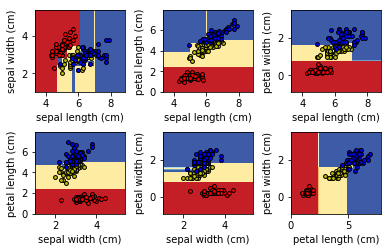

In [3]:
for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                      [1, 2], [1, 3], [2, 3]]):  
    #We only take the two corresponding features  
    X = iris.data[:, pair]  
    y = iris.target   
    #Train  
    clf = DecisionTreeClassifier().fit(X, y)   
    #Plot the decision boundary   
    plt.subplot(2, 3, pairidx + 1)   
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1  
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1  
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                             np.arange(y_min, y_max, plot_step))   
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)   
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])   
    Z = Z.reshape(xx.shape)   
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)   
    plt.xlabel(iris.feature_names[pair[0]])   
    plt.ylabel(iris.feature_names[pair[1]])    
    #Plot the training points   
    for i, color in zip(range(n_classes), plot_colors):   
        idx = np.where(y == i)   
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                            cmap=plt.cm.RdYlBu, edgecolor='black', s=15)    

4.绘制总图，给出标题,并显示图例。    

/usr/local/SkyCompute/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


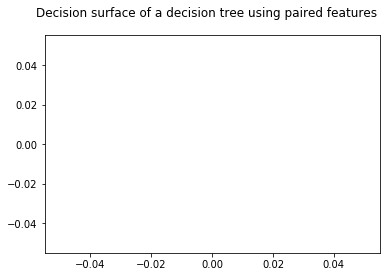

In [4]:
plt.suptitle("Decision surface of a decision tree using paired features")  
plt.legend(loc='lower right', borderpad=0, handletextpad=0)  
plt.axis("tight")  
plt.show()  

## 三、实验注意事项    

1.DecisionTreeClassifier参数解释  
__criterion__ :string类型，可选（默认为"gini"）  
    衡量分类的质量。支持的标准有"gini"代表的是Gini impurity(不纯度)与"entropy"代表的是information gain（信息增益）。  

__splitter__ :string类型，可选（默认为"best"）   
    一种用来在节点中选择分类的策略。支持的策略有"best"，选择最好的分类，"random"选择最好的随机分类。  

__max_features__ :int,float,string or None 可选（默认为None）   
    在进行分类时需要考虑的特征数。  
   1.如果是int，在每次分类是都要考虑max_features个特征。  
   2.如果是float,那么max_features是一个百分率并且分类时需要考虑的特征数是int(max_features$*$n_features,其中n_features是训练完成时发特征数)。  
   3.如果是auto,max_features=sqrt(n_features)  
   4.如果是sqrt,max_features=sqrt(n_features)  
   5.如果是log2,max_features=log2(n_features)  
   6.如果是None，max_features=n_features  
   注意：至少找到一个样本点有效的被分类时，搜索分类才会停止。  

__max_depth__ :int or None,可选（默认为"None"）  
    表示树的最大深度。如果是"None",则节点会一直扩展直到所有的叶子都是纯的或者所有的叶子节点都包含少于min_samples_split个样本点。忽视max_leaf_nodes是不是为None。  

__min_samples_split__ :int,float,可选（默认为2）  
    区分一个内部节点需要的最少的样本数。      
    1.如果是int，将其最为最小的样本数。  
    2.如果是float，min_samples_split是一个百分率并且ceil(min_samples_split$*$n_samples)是每个分类需要的样本数。ceil是取大于或等于指定表达式的最小整数。  

__min_samples_leaf__ :int,float,可选（默认为1）  
    一个叶节点所需要的最小样本数：  
    1.如果是int，则其为最小样本数  
    2.如果是float，则它是一个百分率并且ceil(min_samples_leaf$*$n_samples)是每个节点所需的样本数。  

__min_weight_fraction_leaf__ :float,可选（默认为0）  
    一个叶节点的输入样本所需要的最小的加权分数。  

__max_leaf_nodes__ :int,None 可选（默认为None）  
    在最优方法中使用max_leaf_nodes构建一个树。最好的节点是在杂质相对减少。如果是None则对叶节点的数目没有限制。如果不是None则不考虑max_depth.  

__class_weight__ :dict,list of dicts,"Banlanced" or None,可选（默认为None）  
    表示在表{class_label:weight}中的类的关联权值。如果没有指定，所有类的权值都为1。对于多输出问题，一列字典的顺序可以与一列y的次序相同。  
    "balanced"模型使用y的值去自动适应权值，并且是以输入数据中类的频率的反比例。如：n_samples/(n_classes*np.bincount(y))。  
    对于多输出，每列y的权值都会想乘。  
    如果sample_weight已经指定了，这些权值将于samples以合适的方法相乘。  

__random_state__ :int,RandomState instance or None  
    如果是int,random_state 是随机数字发生器的种子；如果是RandomState，random_state是随机数字发生器，如果是None，随机数字发生器是np.random使用的RandomState instance.  

__persort__ :bool,可选（默认为False）  
    是否预分类数据以加速训练时最好分类的查找。在有大数据集的决策树中，如果设为true可能会减慢训练的过程。当使用一个小数据集或者一个深度受限的决策树中，可以减速训练的过程。  
    
2.DecisionTreeClassifier方法  
__apply(X$[$, check_input])__ :返回样本预测的节点的索引。  
__decision_path(X$[$, check_input])__ :返回决策路径，及判定测试序列。  
__fit(X, y$[$, sample_weight, check_input, …])__ :通过输入生成决策树。  
__get_params($[$deep])__ :获取参数。  
__predict(X$[$, check_input])__ :对输入作出判断分类。  
__predict_log_proba(X)__ :返回对数概率估计。  
__predict_proba(X$[$, check_input])__ :返回概率估计。    
__score(X, y$[$, sample_weight])__ :根据测试数据集返回平局准确度。  
__set_params(**params)__ :设置参数。  

3.DecisionTreeClassifier属性  
__classes_ __ : array of shape = $[$n_classes] or a list of such arrays  
类标签（单输出问题）或类标签数组（多输出问题）。  
   
__feature_importances_ __ : array of shape = $[$n_features]  
   
__max_features_ __ : int型  
   
__n_classes_ __ : int或是list型  
类的数目（对于单输出问题），或包含每个输出的类数（对于多输出问题）的列表。  

__n_features_ __ : int型
进行拟合时的特征数目。  
  
__n_outputs_ __ : int型  
执行拟合时的输出数。  

__tree_ __ : Tree object

## 四、实验拓展  

1.了解DecisionTreeRegressor。  
2.尝试通过max_depth、min_impurity_decrease等来优化模型。  
3.尝试利用GridSearchCV求最优参数。  